In [1]:
x=1

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
adata = sc.read('../../../pipeline/data/pp/mtg_pretrain_pbmc_full/pbmc_full_mtg1.h5ad')
adata

AnnData object with n_obs × n_vars = 647366 × 2188
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch'
    var: 'modality'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'full_clustering_colors', 'initial_clustering_colors', 'modality_lengths', 'neighbors', 'umap'
    obsm: 'X_umap', '_scvi_extra_categorical_covs', 'latent'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
adata.obs['Status_on_day_collection_summary'].cat.categories

Index(['Asymptomatic', 'Critical', 'Healthy', 'LPS_10hours', 'LPS_90mins',
       'Mild', 'Moderate', 'Non_covid', 'Severe'],
      dtype='object')

In [5]:
adata = adata[~adata.obs['Status_on_day_collection_summary'].isin(['Non_covid', 'LPS_10hours', 'LPS_90mins'])].copy()
adata

AnnData object with n_obs × n_vars = 624325 × 2188
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch'
    var: 'modality'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'full_clustering_colors', 'initial_clustering_colors', 'modality_lengths', 'neighbors', 'umap'
    obsm: 'X_umap', '_scvi_extra_categorical_covs', 'latent'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [6]:
adata.obs['Status_on_day_collection_summary'].value_counts()

Moderate        198632
Mild            135936
Healthy          97039
Critical         80852
Severe           78265
Asymptomatic     33601
Name: Status_on_day_collection_summary, dtype: int64

In [7]:
adata.obs[['Status_on_day_collection_summary', 'patient_id']].drop_duplicates().groupby('Status_on_day_collection_summary').agg('count')

,patient_id
Status_on_day_collection_summary,
Asymptomatic,9
Critical,15
Healthy,23
Mild,23
Moderate,30
Severe,13


In [8]:
n_samples = 13

In [9]:
healthy_samples = adata[adata.obs['Status_on_day_collection_summary'] == 'Healthy'].obs['patient_id'].drop_duplicates()
len(healthy_samples)

23

In [10]:
mild_samples = adata[adata.obs['Status_on_day_collection_summary'] == 'Mild'].obs['patient_id'].drop_duplicates()
len(mild_samples)

23

In [11]:
severe_samples = adata[adata.obs['Status_on_day_collection_summary'] == 'Severe'].obs['patient_id'].drop_duplicates()
len(severe_samples)

13

In [12]:
import random
random.seed(123)

In [13]:
healthy_samples_to_keep = random.sample(list(healthy_samples), n_samples)
mild_samples_to_keep = random.sample(list(mild_samples), n_samples)

In [14]:
samples_to_keep = list(severe_samples) + mild_samples_to_keep + list(healthy_samples)
len(samples_to_keep)

49

In [15]:
adata_subset = adata[adata.obs['patient_id'].isin(samples_to_keep)]
adata_subset

View of AnnData object with n_obs × n_vars = 256051 × 2188
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch'
    var: 'modality'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'full_clustering_colors', 'initial_clustering_colors', 'modality_lengths', 'neighbors', 'umap'
    obsm: 'X_umap', '_scvi_extra_categorical_covs', 'latent'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

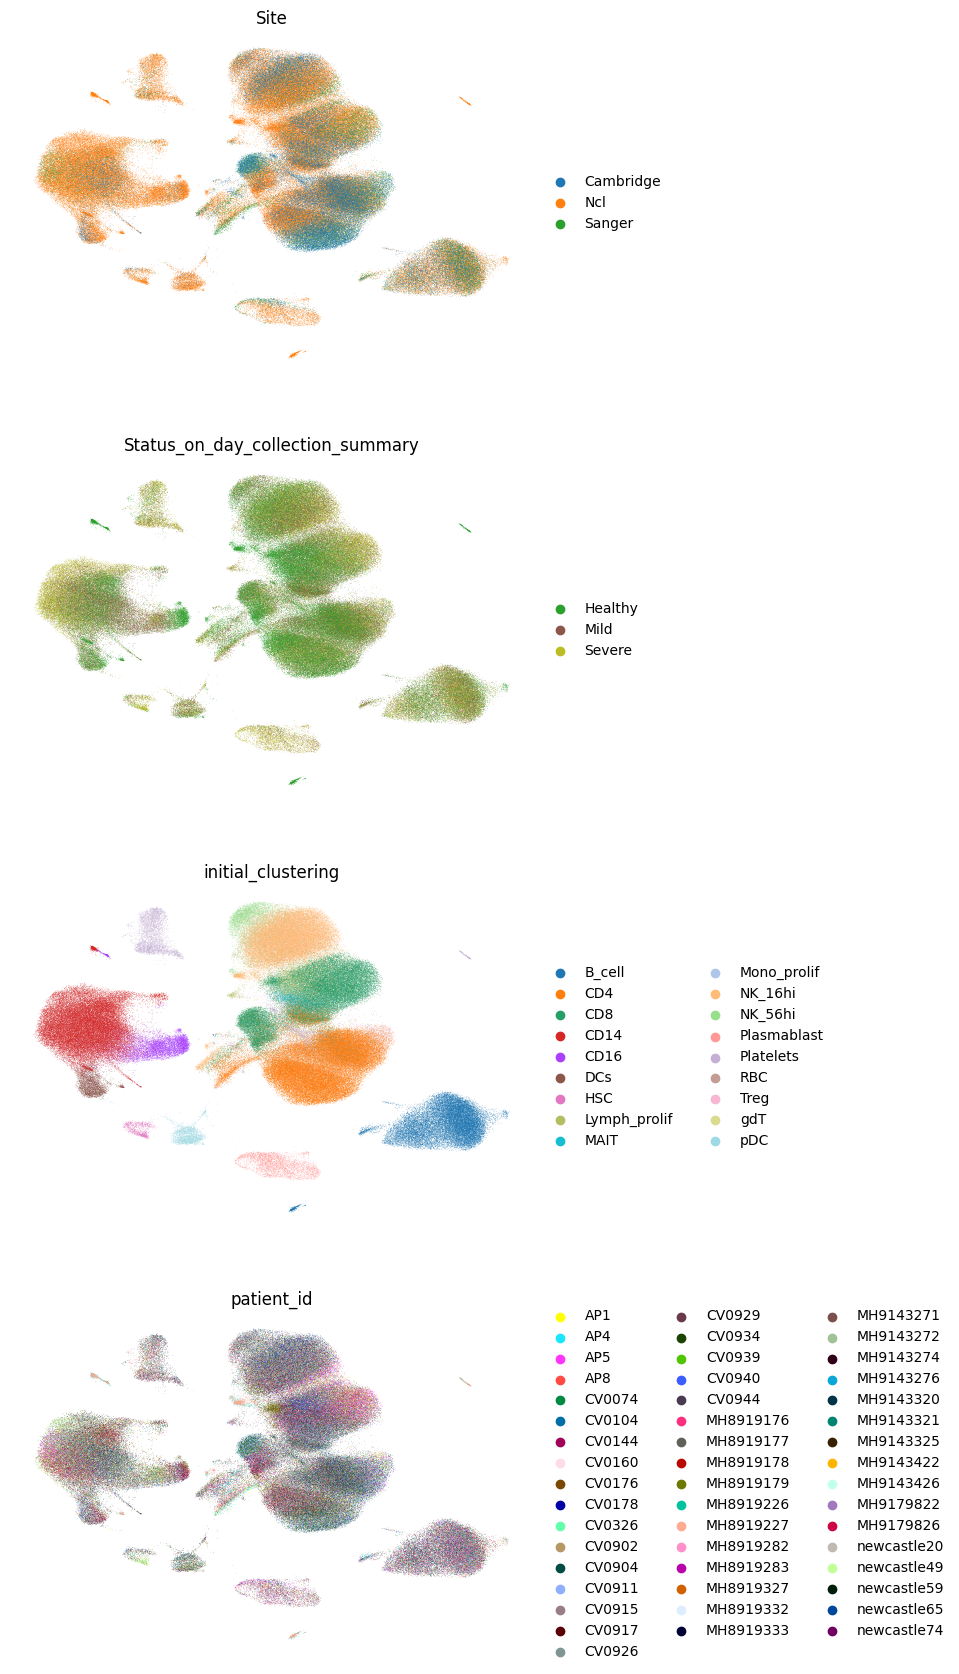

In [16]:
sc.pl.umap(adata_subset, color=['Site', 'Status_on_day_collection_summary', 'initial_clustering', 'patient_id'], ncols=1, frameon=False)

In [17]:
adata_subset.obs['Status_on_day_collection_summary'].value_counts()

Healthy    97039
Mild       80747
Severe     78265
Name: Status_on_day_collection_summary, dtype: int64

In [18]:
adata_subset

AnnData object with n_obs × n_vars = 256051 × 2188
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch'
    var: 'modality'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'full_clustering_colors', 'initial_clustering_colors', 'modality_lengths', 'neighbors', 'umap', 'patient_id_colors'
    obsm: 'X_umap', '_scvi_extra_categorical_covs', 'latent'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [19]:
pd.DataFrame(adata_subset.obsm['latent']).index

RangeIndex(start=0, stop=256051, step=1)

In [20]:
tmp = sc.AnnData(adata_subset.obsm['latent'])
tmp.obs = adata_subset.obs
tmp.obsm['X_umap'] = adata_subset.obsm['X_umap']
tmp

AnnData object with n_obs × n_vars = 256051 × 20
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch'
    obsm: 'X_umap'

In [21]:
tmp.write('../../../pipeline/data/pp/mtg_final1.h5ad')